In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('Downloads/CODE_Brain_Tumor/CODE_Brain_Tumor/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [3]:
!pip install ipywidgets

In [4]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [5]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join(r'C:\Users\ragha\Downloads\CODE_Brain_Tumor\CODE_Brain_Tumor\input\Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join(r'C:\Users\ragha\Downloads\CODE_Brain_Tumor\CODE_Brain_Tumor\input\Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [6]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [8]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

Convolutional Neural Network

In [9]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

c:\Users\ragha\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [12]:

history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 480s 6s/step - accuracy: 0.3056 - loss: 4.8682 - val_accuracy: 0.4422 - val_loss: 1.2794
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 543s 6s/step - accuracy: 0.4573 - loss: 1.1812 - val_accuracy: 0.4796 - val_loss: 1.1489
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 512s 5s/step - accuracy: 0.5500 - loss: 1.0184 - val_accuracy: 0.5884 - val_loss: 0.9079
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 446s 5s/step - accuracy: 0.5928 - loss: 0.8966 - val_accuracy: 0.5884 - val_loss: 0.9078
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 591s 6s/step - accuracy: 0.6244 - loss: 0.8325 - val_accuracy: 0.6565 - val_loss: 0.7599
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 431s 5s/step - accuracy: 0.6591 - loss: 0.7887 - val_accuracy: 0.6293 - val_loss: 0.8370
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 448s 5s/step - accuracy: 0.7124 - loss: 0.6723 - val_accuracy: 0.6837 - val_loss: 0.6951
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 530s 6s/step - accuracy: 0.7474 - loss: 0.6240 - val_accuracy: 0.7041 - v

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

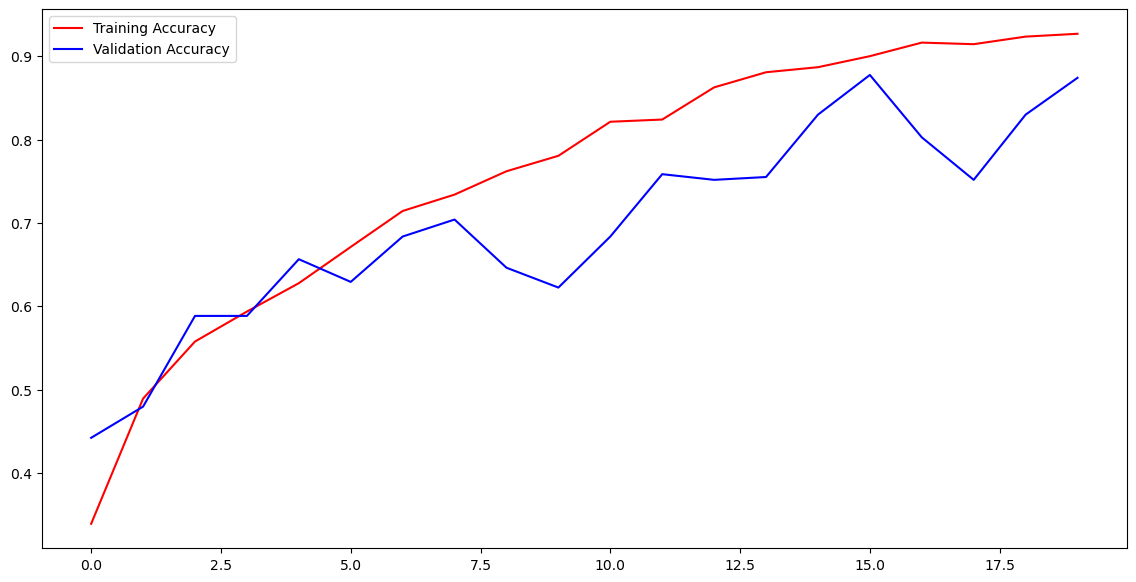

In [16]:
model.save('braintumor.keras')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

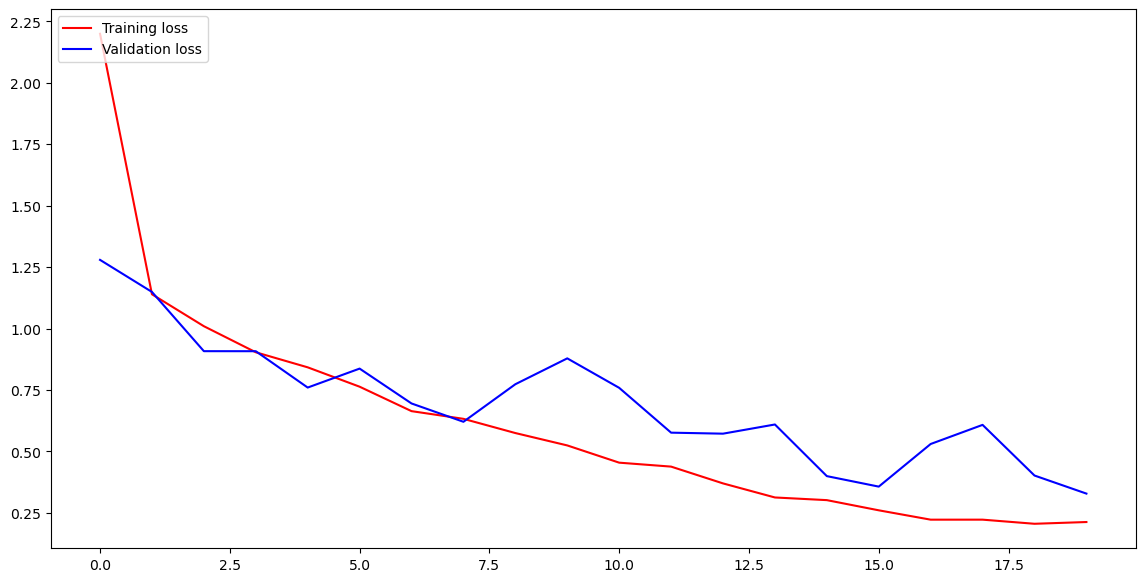

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

Prediction

In [35]:
#prediction of pituitary tumor
img = cv2.imread(r'C:\Users\ragha\Downloads\CODE_Brain_Tumor\CODE_Brain_Tumor\input\Training\pituitary_tumor\p (3).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [36]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

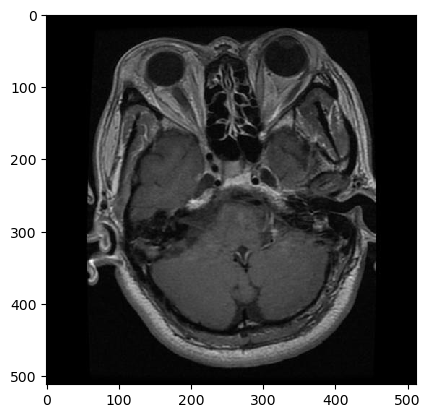

In [37]:
from tensorflow.keras.preprocessing import image
img = image.load_img(r'C:\Users\ragha\Downloads\CODE_Brain_Tumor\CODE_Brain_Tumor\input\Training\pituitary_tumor\p (3).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [38]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


3

In [39]:
!pip install opencv_python

In [40]:
#prediction of no tumor(2)
img = cv2.imread(r'C:\Users\ragha\Downloads\CODE_Brain_Tumor\CODE_Brain_Tumor\input\Training\no_tumor\7.jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [41]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

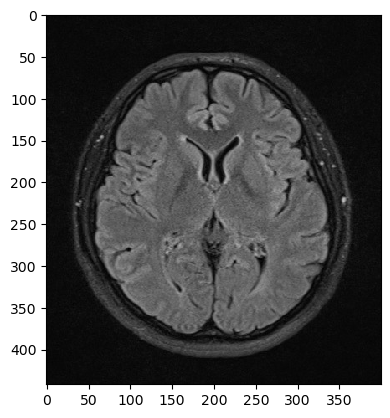

In [42]:
from tensorflow.keras.preprocessing import image
img = image.load_img(r'C:\Users\ragha\Downloads\CODE_Brain_Tumor\CODE_Brain_Tumor\input\Training\no_tumor\7.jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [43]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


2

In [44]:
#prediction of meningioma tumor(1)
img = cv2.imread(r'C:\Users\ragha\Downloads\CODE_Brain_Tumor\CODE_Brain_Tumor\input\Training\meningioma_tumor\m (6).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [45]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

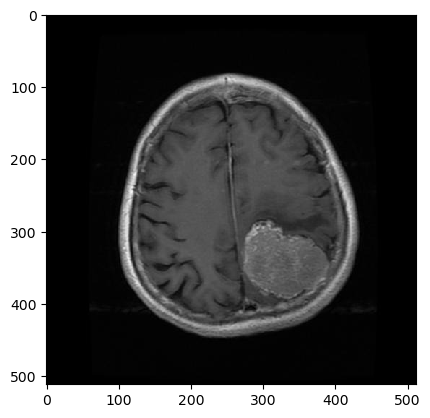

In [46]:
from tensorflow.keras.preprocessing import image
img = image.load_img(r'C:\Users\ragha\Downloads\CODE_Brain_Tumor\CODE_Brain_Tumor\input\Training\meningioma_tumor\m (6).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [47]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


1

In [48]:
#prediction of glioma tumor(0)
img = cv2.imread(r'C:\Users\ragha\Downloads\CODE_Brain_Tumor\CODE_Brain_Tumor\input\Training\glioma_tumor\gg (8).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [49]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

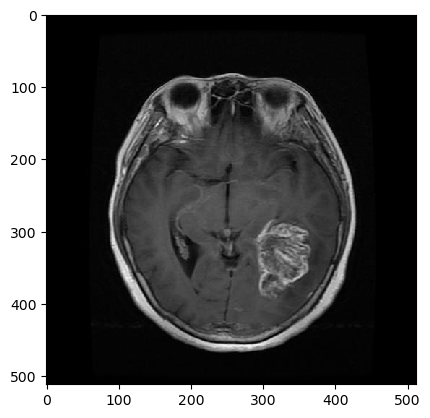

In [50]:
from tensorflow.keras.preprocessing import image
img = image.load_img(r'C:\Users\ragha\Downloads\CODE_Brain_Tumor\CODE_Brain_Tumor\input\Training\glioma_tumor\gg (8).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [51]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


0

In [53]:
!pip install fastapi[all]

  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
Using cached typing_extensions-4.12.2-py3-none-any.whl (37 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.11.0
    Uninstalling typing_extensions-4.11.0:
      Successfully uninstalled typing_extensions-4.11.0
  Using cached fastapi-0.115.6-py3-none-any.whl.metadata (27 kB)
  Using cached starlette-0.41.3-py3-none-any.whl.metadata (6.0 kB)
  Using cached fastapi_cli-0.0.7-py3-none-any.whl.metadata (6.2 kB)
  Using cached python_multipart-0.0.20-py3-none-any.whl.metadata (1.8 kB)
  Using cached orjson-3.10.14-cp312-cp312-win_amd64.whl.metadata (42 kB)
  Using cached email_validator-2.2.0-py3-none-any.whl.metadata (25 kB)
  Using cached uvicorn-0.34.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached pydantic_settings-2.7.1-py3-none-any.whl.metadata (3.5 kB)
  Using cached pydantic_extra_types-2.10.1-py3-none-any.whl.metadata (3.5 kB)
  Using cached dnspython-2.7